In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
### the validation set is only 30% of the train , should use the out of fold prediction of the CV to have something more accurate

os.chdir('c:/data/bosh/python/')
oof = pd.read_csv("../preds/validation_34086.csv.gz",usecols=['Response','proba','GF_LEAD_LEAK','GF_LAG_LEAK','GF_LEAD_MAYBE','GF_LAG_MAYBE','DATE_S32max'])
oof.columns
thresholds = np.linspace(0.01, 0.999, 100)
oof['Prediction'] =oof['proba']

('best_threshold :', 0.5794242424242424, 'mcc max : ', 0.46654071608125042, 'oo shape', (355125, 8), ' num Response=1', 2057L)


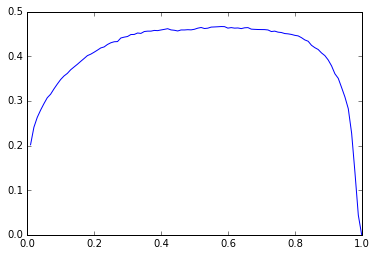

In [13]:
#ALL rows
oo = oof
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())

('best_threshold :', 0.41958585858585856, 'mcc max : ', 0.46108396762070403, 'oo shape', (130, 8), ' num Response=1', 117L)


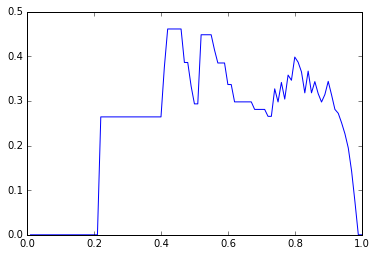

In [14]:
#GF1 : looks not good
oo = oof.loc[(oof['GF_LEAD_LEAK'] == 1) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())


('best_threshold :', 0.60939393939393938, 'mcc max : ', 0.84100494780631518, 'oo shape', (391, 8), ' num Response=1', 106L)


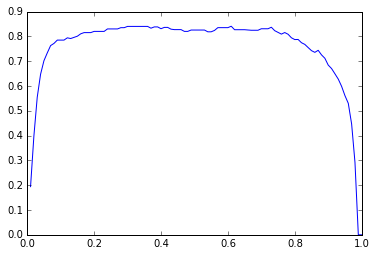

In [15]:
#GF1
oo = oof.loc[(oof['GF_LAG_LEAK'] == 1) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())


('best_threshold :', 0.7192828282828283, 'mcc max : ', 0.35729894883746349, 'oo shape', (7183, 8), ' num Response=1', 384L)


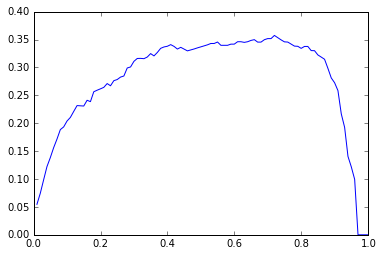

In [16]:
#GF_LEAD_MAYBE
oo = oof.loc[(oof['GF_LEAD_MAYBE'] == 1) ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())


('best_threshold :', 0.50949494949494945, 'mcc max : ', 0.53810333811327005, 'oo shape', (7177, 8), ' num Response=1', 111L)


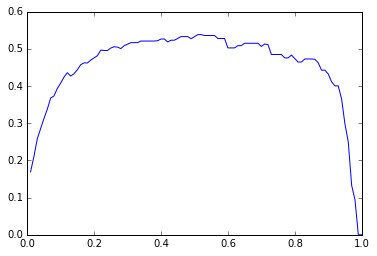

In [17]:

#GF0  
oo = oof.loc[(oof['GF_LAG_MAYBE'] ==1)  ]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())


('best_threshold :', 0.38961616161616164, 'mcc max : ', 0.77631014936052245, 'oo shape', (6984, 8), ' num Response=1', 194L)


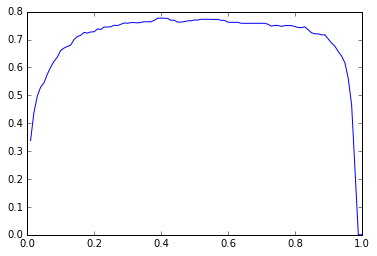

In [18]:
#GF0  GF1 and S32
oo = oof.loc[(oof['DATE_S32max']>= 0 ) & (oof['GF_LAG_LEAK'] == 0) & (oof['GF_LEAD_LEAK'] == 0) & (oof['GF_LAG_MAYBE'] == 0) & (oof['GF_LEAD_MAYBE'] == 0)]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())



('best_threshold :', 0.27972727272727271, 'mcc max : ', 0.30118385627224886, 'oo shape', (333581, 8), ' num Response=1', 1158L)


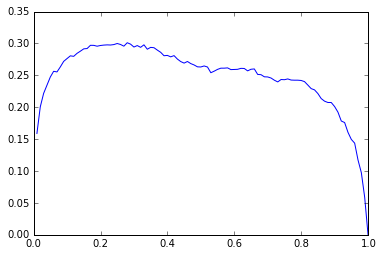

In [19]:
#rest of the data not in S32 or LEAK
oo = oof.loc[(oof['DATE_S32max'] <0 ) & (oof['GF_LAG_LEAK'] == 0) & (oof['GF_LEAD_LEAK'] == 0) & (oof['GF_LAG_MAYBE'] == 0) & (oof['GF_LEAD_MAYBE'] == 0)]
mcc = np.array([matthews_corrcoef(oo['Response'], oo['Prediction']>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
print('best_threshold :',thresholds[mcc.argmax()],'mcc max : ',mcc.max(),'oo shape',oo.shape,' num Response=1',oo['Response'].sum())

